Clustering Model (Unsupervised Learning)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_customers.csv')
df = df.drop('CustomerID' ,axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


- Scaling the features (Standard Scalar)

In [2]:
from sklearn.preprocessing import StandardScaler

X1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

std_scalar = StandardScaler()
X1 = std_scalar.fit_transform(X1)

X1 = pd.DataFrame(X1, columns=['Age','Annual Income (k$)','Spending Score (1-100)'])

In [3]:
X1.describe().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000
mean,-0.000,-0.000,-0.000
std,1.003,1.003,1.003
min,-1.496,-1.739,-1.910
25%,-0.725,-0.728,-0.600
50%,-0.205,0.036,-0.008
75%,0.728,0.666,0.885
max,2.236,2.918,1.894


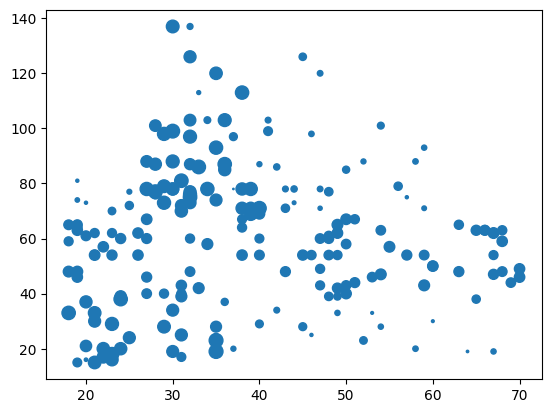

In [4]:
plt.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])

Elbow plot method

In [5]:
#Using elbow method to figure out number of k-clusters
from sklearn.cluster import KMeans

k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

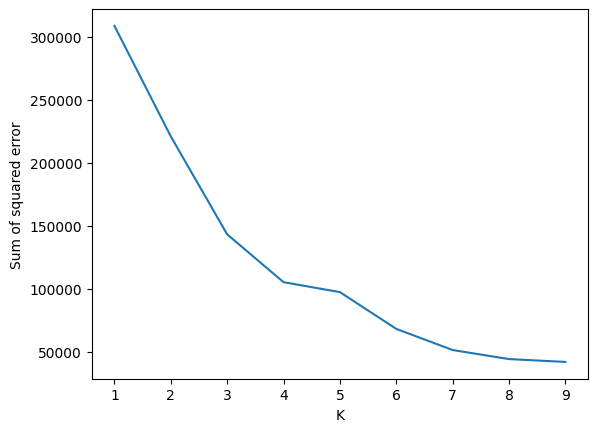

In [6]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

Insight: From the above plot, K=5 lies at the elbow and hence 5 clusters will be made

In [7]:
km_final = KMeans(n_clusters=4)

y_predicted = km_final.fit_predict(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [8]:
df['cluster'] = y_predicted

df.head(6)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,1
5,Female,22,17,76,2


Using PCA + Scatter plot since i have 3 features

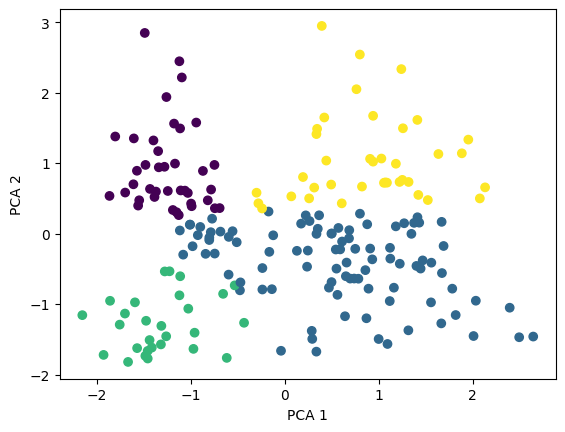

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #(compressing all the points to 2D)
pca_data = pca.fit_transform(X1)

#now plotting it
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [10]:
#mashup of age, income, spending score
pca.components_

array([[ 0.70638235, -0.04802398, -0.70619946],
       [ 0.03014116,  0.9988316 , -0.03777499]])

In [11]:
print("Current cluster labels:", df['cluster'].unique())


Current cluster labels: [2 1 0 3]


Finding avg of the features of each cluster

In [12]:
df.groupby('cluster').mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,32.692308,86.538462,82.128205
1,44.894737,48.705263,42.631579
2,24.821429,28.714286,74.250000
3,40.394737,87.000000,18.631579


Types of customers in each group:

- Group1: Conservative buyers - Adults with conservative expenditure.
- Group2: Luxury spenders - Adults with luxury spending.
- Group3: Balanced spenders - Middle Aged/older with medium expenditure.
- Group4: High Spending Youth - Youths with less annual income and more expenditure.


Using these labels for PCA plot

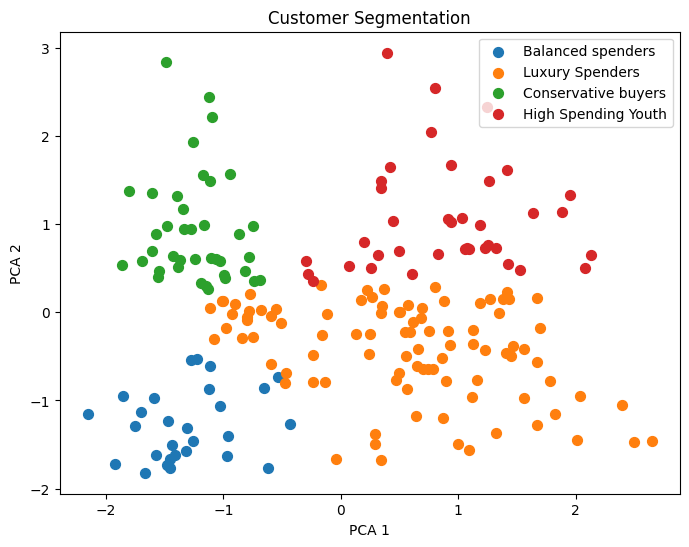

In [13]:
plt.figure(figsize=(8, 6))

group_labels = {
    0: 'Conservative buyers',
    1: 'Luxury Spenders',
    2: 'Balanced spenders',
    3: 'High Spending Youth'
}

for cluster in df['cluster'].unique():
    subset = pca_data[df['cluster'] == cluster]
    plt.scatter(
        subset[:, 0],
        subset[:, 1],
        label = group_labels[cluster],
        s=50
    )
    
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation')
plt.legend()
plt.show()